# Marketing and Retail Analytics Capstone Project - Olist

## Problem Statement
OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing.<br>
As part of managing the inventory cost ,Olist wants to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

To be specific the company wants to understand the following factors.
- The top 20 ordered products by quantity are identified.
- The top 20 products by revenue are identified.
- The product categories which are ordered more than 5 times are identified.
- Combinations of product categories which are frequently ordered together are identified.

In [46]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
# Display options setting so as to see all the rows and columns of the dataframe
pd.set_option('display.max_columns',None) #to dispaly all columns of dataframe
pd.set_option('display.max_rows',None) #to dispaly all rows of dataframe

### Step 1 : 
#### Reading and Understanding the data set

In [48]:
# reading each sheet from the excel into each dataframe

# reading 'orders' sheet into df_orders dataframe
df_orders=pd.read_excel("Retail_dataset.xlsx",'orders')

# reading 'order_items' sheet into df_items dataframe
df_items=pd.read_excel("Retail_dataset.xlsx",sheet_name='order_items')

# reading 'customers' sheet into df_customers dataframe
df_customers=pd.read_excel("Retail_dataset.xlsx",sheet_name='customers')

# reading 'payments' sheet into df_payments dataframe
df_payments=pd.read_excel("Retail_dataset.xlsx",sheet_name='payments')


# reading 'products' sheet into df_products dataframe
df_products=pd.read_excel("Retail_dataset.xlsx",sheet_name='products')

In [49]:
# Checking df_orders dataframe

***From the ERD given in the excel file it is evident that the different sheets can be combined .<br>Merging the dataframes to form a single dataframe for ease of analysis.*** <br>

***However the 'Customers' and 'Payments' sheets data does not seem to be relevant for the analysis. Hence these dataframes are not merged.***

In [50]:
# merging the dataframes to form a single dataset
df=pd.merge(df_orders,df_items,on='order_id')
df=df.merge(df_products,on='product_id')

In [51]:
# Checking the head of the dataframe 
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,e781fdcc107d13d865fc7698711cc572,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0


In [52]:
#checking the shape of the dataset
df.shape

(112650, 17)

In [53]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_timestamp      110196 non-null  datetime64[ns]
 6   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 7   order_item_id                  112650 non-null  int64         
 8   product_id                     112650 non-null  object        
 9   seller_id                      112650 non-null  object        
 10  price                          112650 non-null  float64       
 11  

In [54]:
#Checking the summary of the dataset
df.describe()

,order_item_id,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000


## Step 2: Data Cleaning and Preparation
### 1. Checking for Missing Values in Dataframe

In [55]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_timestamp        2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
product_category_name             393
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64

In [56]:
# Finding the null value percentage of each columns
missing_val=(df.isnull().sum()/len(df))*100
missing_val

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.013316
order_delivered_timestamp        2.178429
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
price                            0.000000
shipping_charges                 0.000000
product_category_name            0.348868
product_weight_g                 0.015979
product_length_cm                0.015979
product_height_cm                0.015979
product_width_cm                 0.015979
dtype: float64

### 2. Imputing the missing values

#### product_weight_g,product_length_cm,product_height_cm,product_width_cm

In [57]:
#The missing values in the 'product_weight_g','product_length_cm','product_height_cm,'product_width_cm' is less than 0.01 %.
# Hence imputing them using the mean value.
df['product_weight_g'].fillna(df['product_weight_g'].mean(), inplace = True)
df['product_length_cm'].fillna(df['product_length_cm'].mean(), inplace = True)
df['product_height_cm'].fillna(df['product_height_cm'].mean(), inplace = True)
df['product_width_cm'].fillna(df['product_width_cm'].mean(), inplace = True)

#### product_category_name

In [58]:
# Checking the value counts of product category to understand the mode value.
df['product_category_name'].value_counts()

toys                                       84483
health_beauty                               3066
bed_bath_table                              2608
sports_leisure                              2313
computers_accessories                       2175
furniture_decor                             2130
housewares                                  1699
watches_gifts                               1542
telephony                                   1203
auto                                        1078
garden_tools                                1042
cool_stuff                                   986
perfumery                                    833
baby                                         778
electronics                                  716
office_furniture                             683
stationery                                   617
pet_shop                                     502
fashion_bags_accessories                     429
construction_tools_construction              245
home_appliances     

In [59]:
# imputing the missing value with mode
df['product_category_name'].fillna(df['product_category_name'].mode(),inplace=True)

#### order_approved_at , order_delivered_timestamp

In [60]:
# Since imputing these columns with mean or median would create incorrect data , dropping the rows.
df.dropna(axis=0,inplace=True)

In [61]:
#Checking the null values in the dataset
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [62]:
# checking the shape of the dataset
df.shape

(109806, 17)

### 3. Checking outliers

#### Price

In [63]:
df.price.describe()

count    109806.000000
mean        120.015554
std         182.404434
min           0.850000
25%          39.900000
50%          74.900000
75%         134.565000
max        6735.000000
Name: price, dtype: float64

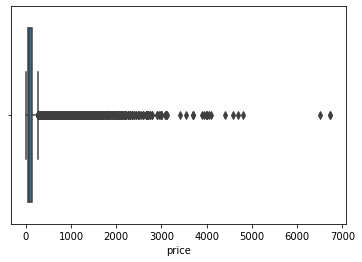

In [64]:
sns.boxplot(df.price)
plt.show()

***Inference : Presence of outliers can be detected.However these values does not seem to be incorrect values as they are gradually increasing until 3500 .Let us have a look at the dataset where price is above 3500.***

In [65]:
df[df.price>3500]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
34503,b239ca7cd485940b31882363b52e6674,ca27f3dac28fb1063faddd424c9d95fa,delivered,2018-07-29 08:39:48,2018-07-30 08:15:14,2018-07-31 23:03:28,2018-08-07,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,4059.00,104.51,toys,8000.0,55.0,25.0,45.0
34504,a53e05ecd2ed1f46a2b8e1f5828be7c6,bc5e25094a7d51b6aee35236572e64f4,delivered,2018-01-26 14:30:21,2018-01-27 14:35:51,2018-02-02 13:53:10,2018-02-15,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,3690.00,136.80,toys,8000.0,55.0,25.0,45.0
38925,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,6499.00,227.66,toys,7400.0,47.0,25.0,25.0
54655,80dfedb6d17bf23539beeef3c768f4d7,edf81e1f3070b9dac83ec83dacdbb9bc,delivered,2017-04-18 20:37:26,2017-04-18 20:50:13,2017-05-04 14:13:36,2017-05-16,1,4ca7b91a31637bd24fb8e559d5e015e4,59417c56835dd8e2e72f91f809cd4092,3999.00,195.76,small_appliances,20500.0,39.0,39.0,58.0
63788,426a9742b533fc6fed17d1fd6d143d7e,edde2314c6c30e864a128ac95d6b2112,delivered,2018-08-03 21:10:16,2018-08-06 14:24:28,2018-08-08 22:51:57,2018-08-20,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,4399.87,113.45,toys,3550.0,71.0,34.0,22.0
75245,68101694e5c5dc7330c91e1bbc36214f,fa562ef24d41361e476e748681810e1e,delivered,2018-03-29 10:31:29,2018-03-31 08:27:27,2018-04-06 22:35:30,2018-04-17,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,4099.99,75.27,toys,3050.0,34.0,10.0,22.0
78422,0812eb902a67711a1cb742b3cdaa65ae,dc4802a71eae9be1dd28f5d788ceb526,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-03-03 14:23:18,2017-03-09,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.00,194.31,housewares,30000.0,60.0,61.0,33.0
84179,fefacc66af859508bf1a7934eab1e97f,459bef486812aa25204be022145caa62,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-15 14:57:50,2018-08-10,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.00,193.21,toys,5660.0,54.0,18.0,47.0
88159,d3f66901a6743e15f9311547cc623b91,3fec1a05177762f279472253113d568a,delivered,2018-03-21 15:06:34,2018-03-22 17:48:31,2018-04-02 23:33:33,2018-04-12,1,1953c4e517bc25739bc4223ede2ff5bc,2bf6a2c1e71bbd29a4ad64e6d3c3629f,3700.00,92.59,toys,800.0,25.0,14.0,16.0
92153,199af31afc78c699f0dbf71fb178d4d4,eebb5dda148d3893cdaf5b5ca3040ccb,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-05-07 10:42:39,2017-05-15,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,4690.00,74.34,toys,30000.0,50.0,49.0,50.0


***Inference: These values seems to be correct, as there are not products with weight less than 800. So heavier products can have higher prices.Hence these outliers are left untreated.***

In [66]:
df.shipping_charges.describe()

count    109806.000000
mean         19.950303
std          15.703749
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: shipping_charges, dtype: float64

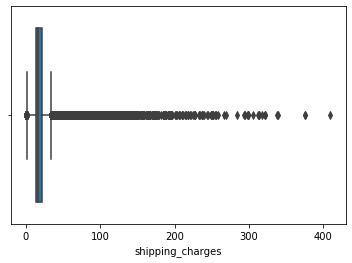

In [67]:
sns.boxplot(df.shipping_charges)
plt.show()

***Inference :The shipping values are gradually increasing ,hence let us have a look at data more than 300.***

In [68]:
df[df.shipping_charges>300]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
40504,0b6230647ed16f4b3e70282dc4b5b87f,ecf7874aa8a2586adf6ca37fab21ecc2,delivered,2018-05-16 13:05:37,2018-05-17 19:36:10,2018-06-12 19:06:34,2018-06-14,1,46e24ce614899e36617e37ea1e4aa6ff,17f51e7198701186712e53a39c564617,1050.00,321.88,toys,30000.0,55.0,75.0,61.0
53565,c7a07ddd52bbe18b61da49a8d89853d3,0820b88e46f48599042bd627fe954b66,delivered,2018-07-13 10:33:48,2018-07-13 10:45:11,2018-07-31 22:48:52,2018-08-15,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,1050.00,322.10,toys,30000.0,55.0,75.0,61.0
53569,264a7e199467906c0727394df82d1a6a,5f2f6fba74de007241fedfc485b72ba7,delivered,2018-04-06 17:20:33,2018-04-07 17:15:10,2018-05-08 13:12:16,2018-05-21,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,1050.00,338.30,toys,30000.0,55.0,75.0,61.0
56562,076d1555fb53a89b0ef4d529e527a0f6,f140f377d666848e3712b51a2734d120,delivered,2018-07-30 10:04:21,2018-08-01 04:35:22,2018-08-08 00:46:43,2018-08-14,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2338.08,375.28,toys,30000.0,75.0,58.0,65.0
56563,3fde74c28a3d5d618c00f26d51baafa0,5e92460d739e8dd987e279285a1d278c,delivered,2018-08-13 14:07:50,2018-08-15 03:15:09,2018-08-24 00:14:39,2018-09-05,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2338.08,375.28,toys,30000.0,75.0,58.0,65.0
58725,0e4672661531addf3fa0f55961e55242,be2f2a80a6cfb6001c403b7a01c87db6,delivered,2017-06-25 08:11:23,2017-06-27 04:03:18,2017-07-28 19:25:43,2017-08-08,1,dc861f18267cce21f3b70f9f7990b8ce,17f51e7198701186712e53a39c564617,990.00,314.02,toys,30000.0,55.0,75.0,61.0
68949,6ddfbf514959b49b6410c01ad93054bb,aa4e2575d36a7b89546ca2e4087e9396,delivered,2017-11-23 15:10:22,2017-11-25 15:10:57,2017-12-20 22:58:14,2017-12-22,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,1045.00,314.40,construction_tools_construction,30000.0,100.0,50.0,50.0
68951,0822bcde10bb5d023755a71bc8f7797f,e3b3b57caa0974d93ed5218dde2ff4b3,delivered,2018-05-07 23:29:24,2018-05-07 23:52:39,2018-05-15 20:39:07,2018-05-22,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,990.00,321.46,construction_tools_construction,30000.0,100.0,50.0,50.0
70441,9f49bd16053df810384e793386312674,c6f70f6262d971489361b0d4fb0936ed,delivered,2018-07-29 11:41:33,2018-07-31 04:31:32,2018-08-06 20:07:34,2018-08-22,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,1149.00,339.59,toys,25250.0,68.0,66.0,66.0
74497,fe12e676fd493885d417a34bc3917411,3d17b748f8eed69a279e77fa3c10b20b,delivered,2017-05-22 18:28:29,2017-05-22 18:35:15,2017-06-13 07:25:40,2017-07-05,1,1d16c0509e7011656e03c6a582ff6667,17f51e7198701186712e53a39c564617,760.00,312.41,toys,30000.0,55.0,75.0,61.0


***Inference: The items with higher shipping charges are heavier items too.Hence these values seems to be correct data and are left untreated.***
    

In [69]:
df.product_weight_g.describe()

count    109806.000000
mean       2088.565098
std        3738.522799
min           0.000000
25%         300.000000
50%         700.000000
75%        1800.000000
max       40425.000000
Name: product_weight_g, dtype: float64

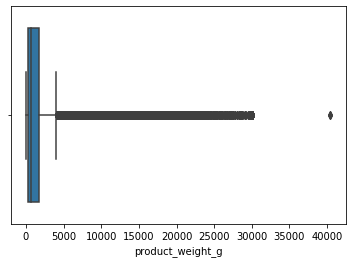

In [70]:
sns.boxplot(df.product_weight_g)
plt.show()

***Inference: The datapoints are all continously increasing up until 30000.Since there is only one datapoint above that,it can be considered as a outlier and can be removed.***

In [71]:
df=df[df.product_weight_g<35000]

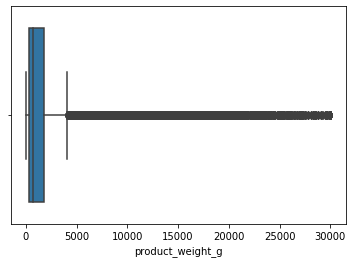

In [72]:
sns.boxplot(df.product_weight_g)
plt.show()

***The outlier value is removed.***

In [73]:
df.product_length_cm.describe()

count    109803.000000
mean         30.145431
std          16.128813
min           7.000000
25%          18.000000
50%          25.000000
75%          38.000000
max         105.000000
Name: product_length_cm, dtype: float64

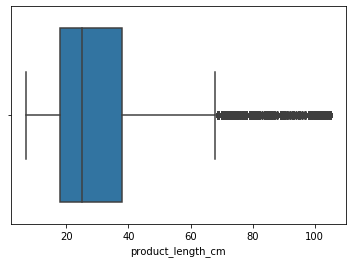

In [74]:
sns.boxplot(df.product_length_cm)
plt.show()

***Inference: The values seem to be gradually increasing and hence outliers are not treated.***

In [75]:
df.product_height_cm.describe()

count    109803.000000
mean         16.557650
std          13.408211
min           2.000000
25%           8.000000
50%          13.000000
75%          20.000000
max         105.000000
Name: product_height_cm, dtype: float64

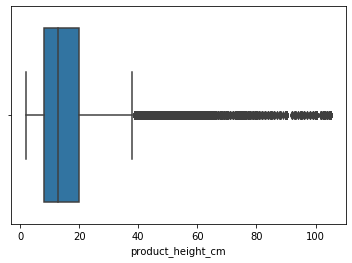

In [76]:
sns.boxplot(df.product_height_cm)
plt.show()

***Inference: The values seem to be gradually increasing and hence outliers are not treated.***

In [77]:
df.product_width_cm.describe()

count    109803.000000
mean         22.991621
std          11.687108
min           6.000000
25%          15.000000
50%          20.000000
75%          30.000000
max         118.000000
Name: product_width_cm, dtype: float64

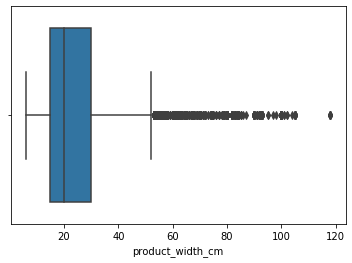

In [78]:
sns.boxplot(df.product_width_cm)
plt.show()

In [79]:
df[df.product_width_cm>110]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
68151,0a0090ae69392fa38ee742006f8c0a90,a7d9a3e447614288937ad2bba991676c,delivered,2017-08-11 21:59:05,2017-08-11 22:25:10,2017-08-22 18:05:55,2017-08-31,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,85.5,9.91,toys,1050.0,23.0,93.0,118.0
68152,1a2442f225e9147e717dfaa6a93058d4,231b15fc7a2d0b20ec277816e0385cda,delivered,2017-03-20 22:21:57,2017-03-20 22:21:57,2017-03-24 10:50:15,2017-04-06,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,68.9,11.87,toys,1050.0,23.0,93.0,118.0
68153,3a5271b57335b6f18985d213924b3ca0,63ec4c57fcfdce705d77573e49e2068e,delivered,2017-05-24 12:43:47,2017-05-26 02:25:25,2017-06-08 14:22:22,2017-06-13,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,68.9,12.82,toys,1050.0,23.0,93.0,118.0
68154,e5c0d192e1f883b21e7673f73cb644b9,5f0e0a97623a857fcfceb2d71d042d1b,delivered,2017-05-06 18:23:13,2017-05-06 18:35:13,2017-05-16 10:07:30,2017-05-29,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,68.9,12.82,toys,1050.0,23.0,93.0,118.0
68155,4ae136c7611e6052ec06035442490f24,ad585bf696fc252c06f084e8a2fbf784,delivered,2017-10-23 23:13:30,2017-10-23 23:28:07,2017-11-22 16:40:00,2017-11-09,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,85.5,13.62,toys,1050.0,23.0,93.0,118.0
68156,e1000df659259b29cb73a4798ccd7454,7bc7dbe918ad4e7bd68abd2479727ad6,delivered,2017-01-18 23:02:45,2017-01-18 23:10:20,2017-02-09 12:33:46,2017-02-28,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,68.9,15.69,toys,1050.0,23.0,93.0,118.0
68157,db6c6df011e1bcc8e03e81b23982a1dc,7e53420f2126366b3489c18314f82803,delivered,2017-05-11 12:10:03,2017-05-11 13:05:31,2017-05-19 19:22:16,2017-05-31,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,68.9,17.49,toys,1050.0,23.0,93.0,118.0
68158,4f4ec4d17cddc9375e76be0d91e5a51d,54ec75b3b0e0725f41c6aa0c4a0ffed1,delivered,2017-12-29 21:30:30,2017-12-29 22:06:39,2018-01-10 18:38:47,2018-01-31,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,85.5,17.85,toys,1050.0,23.0,93.0,118.0


***Inference: The values seem to be incorrect hence left untreated.***

In [80]:
# checking the shape of the dataset
df.shape

(109803, 17)

### Percentage of rows left after data cleaning

In [81]:
(109803/112650)*100

97.47270306258322

***Inference: 97% of data is left after data cleaning.***

### Checking for duplicate rows

In [82]:
duplicate = df[df.duplicated()]

In [83]:
duplicate

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm


***Inference: There are no duplicate rows in the database.***

In [84]:
df.shape

(109803, 17)

### Dropping unwanted rows from the dataset

In [85]:
# Since the analysis needs to be done on the items where order_status is delivered , the remaning rows can be dropped.
df=df[df['order_status']=='delivered']

In [86]:
df.shape

(109796, 17)

In [87]:
# Coverting the dataframe to excel
df.to_excel(r"C:\Users\Sajin\Desktop\Capstone_project_SumithaT\Retail_dataset_updated.xlsx") 

***Inference:    After Data clean up the dataset is read into an excel file.Furthur analysis will be done in Tableau.***